In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model_pipleine import ModelPipeline

In [2]:
data_folder  = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 0",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 1",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 2",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 3",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 4",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 5",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 6",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 7",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 8",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 9",
]

In [3]:
pipeline = ModelPipeline(data_folder=data_folder)

Loading Dataset .............
Shape of imags are: torch.Size([36793, 1, 64, 64])
Total images lodded: 36793


Label 0: 4651 number of images
Label 1: 4273 number of images
Label 2: 3878 number of images
Label 3: 2944 number of images
Label 4: 3958 number of images
Label 5: 3878 number of images
Label 6: 3240 number of images
Label 7: 3355 number of images
Label 8: 3382 number of images
Label 9: 3234 number of images


Dataset loaded successfully!
Unique labels in dataset: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
train size: 33113
test size: 3680


In [4]:
fold_losses, fold_accuracies, avg_accuracy, avg_error = pipeline.cross_validate_model(n_jobs=5)

Average Accuracy: 96.30%
Average Error: 0.0370


In [5]:
print("Fold Losses:", fold_losses)
print("Fold Accuracies:", fold_accuracies)
print("Average Accuracy:", avg_accuracy)
print("Average Error:", avg_error)

Fold Losses: [0.06338211173603597, 0.07538153628523175, 0.06290388150507799, 0.06658840811891983, 0.06155809935724112]
Fold Accuracies: [96.5423524082742, 95.89309980371434, 96.22527555488449, 96.43612201751736, 96.39081848384174]
Average Accuracy: 96.29753365364643
Average Error: 0.03702466346353572


In [6]:
pipeline.test_model()

Accuracy: 95.95%


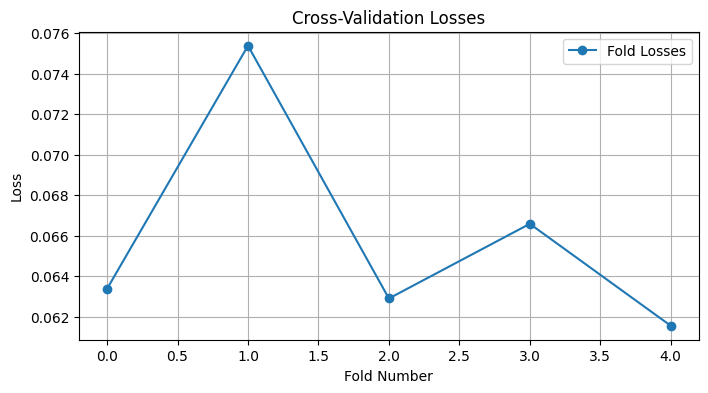

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(fold_losses, marker='o', label='Fold Losses')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.title('Cross-Validation Losses')
plt.legend()
plt.grid()
plt.show()

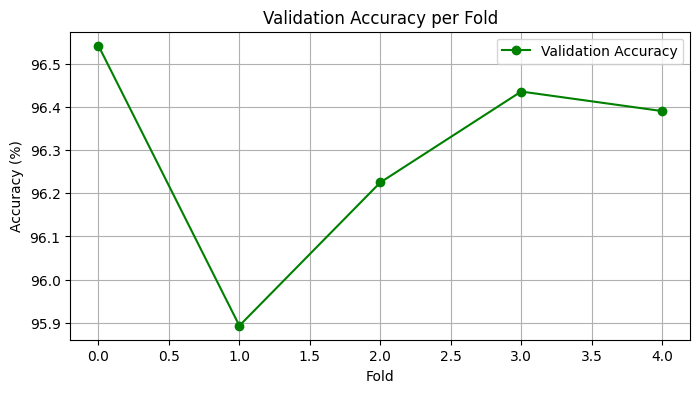

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(fold_accuracies, marker='o', color='green', label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Fold')
plt.grid(True)
plt.legend()
plt.show()

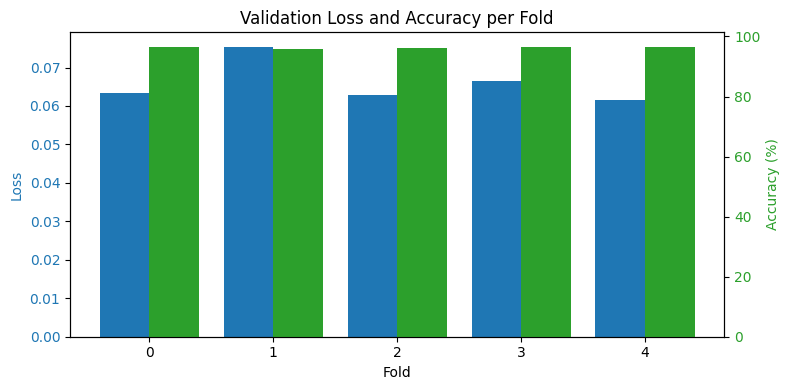

In [9]:
x = np.arange(len(fold_losses))
fig, ax1 = plt.subplots(figsize=(8, 4))

color = 'tab:blue'
ax1.set_xlabel('Fold')
ax1.set_ylabel('Loss', color=color)
ax1.bar(x - 0.2, fold_losses, width=0.4, color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.bar(x + 0.2, fold_accuracies, width=0.4, color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Validation Loss and Accuracy per Fold')
fig.tight_layout()
plt.show()

In [10]:
pipeline.save_model()

Model parameters saved to C:\Users\visha\OneDrive\Desktop\MathAI\CNN_Model\model_parameters_for_CNN.pth
